## Final Assignment on Data Visualization

#### Task 1

A survey was conducted to gauge an audience interest in different data science topics, namely:
1. Big Data (Spark / Hadoop)
2. Data Analysis / Statistics
3. Data Journalism
4. Data Visualization
5. Deep Learning
6. Machine Learning

The participants had three options for each topic: **Very Interested, Somewhat interested**, and **Not interested. 2,233** respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: [Topic_Survey_Assignment](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Topic_Survey_Assignment.csv)

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

Use the pandas read_csv method to read the csv file into a pandas dataframe

In [5]:
# import two key data analysis modules: numpy and pandas
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [6]:
# read the data into pandas dataframe
df_survey = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Topic_Survey_Assignment.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [7]:
# display the dataset
df_survey

Very interested  Somewhat interested  \
Big Data (Spark / Hadoop)              1332                  729   
Data Analysis / Statistics             1688                  444   
Data Journalism                         429                 1081   
Data Visualization                     1340                  734   
Deep Learning                          1263                  770   
Machine Learning                       1629                  477   

                            Not interested  
Big Data (Spark / Hadoop)              127  
Data Analysis / Statistics              60  
Data Journalism                        610  
Data Visualization                     102  
Deep Learning                          136  
Machine Learning                        74

In [8]:
# visualize the percentage of the respondents' interest in the different data science topics surveyed using artist layer in Matplotlib
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


In [23]:
# sort dataframe in descending order of Very interested
df_sort = df_survey.sort_values(by='Very interested', ascending=False)
df_sort

Very interested  Somewhat interested  \
Data Analysis / Statistics             1688                  444   
Machine Learning                       1629                  477   
Data Visualization                     1340                  734   
Big Data (Spark / Hadoop)              1332                  729   
Deep Learning                          1263                  770   
Data Journalism                         429                 1081   

                            Not interested  
Data Analysis / Statistics              60  
Machine Learning                        74  
Data Visualization                     102  
Big Data (Spark / Hadoop)              127  
Deep Learning                          136  
Data Journalism                        610

In [26]:
# convert the numbers into percentages of the total number of respondents
df_respondent = 2233
df_perc = round(df_sort/df_respondent*100, 2)
df_perc

Very interested  Somewhat interested  \
Data Analysis / Statistics            75.59                19.88   
Machine Learning                      72.95                21.36   
Data Visualization                    60.01                32.87   
Big Data (Spark / Hadoop)             59.65                32.65   
Deep Learning                         56.56                34.48   
Data Journalism                       19.21                48.41   

                            Not interested  
Data Analysis / Statistics            2.69  
Machine Learning                      3.31  
Data Visualization                    4.57  
Big Data (Spark / Hadoop)             5.69  
Deep Learning                         6.09  
Data Journalism                      27.32

Use the artist layer of Matplotlib to replicate the bar chart and visualize the percentage of the respondents' interest in the different data science topics surveyed.

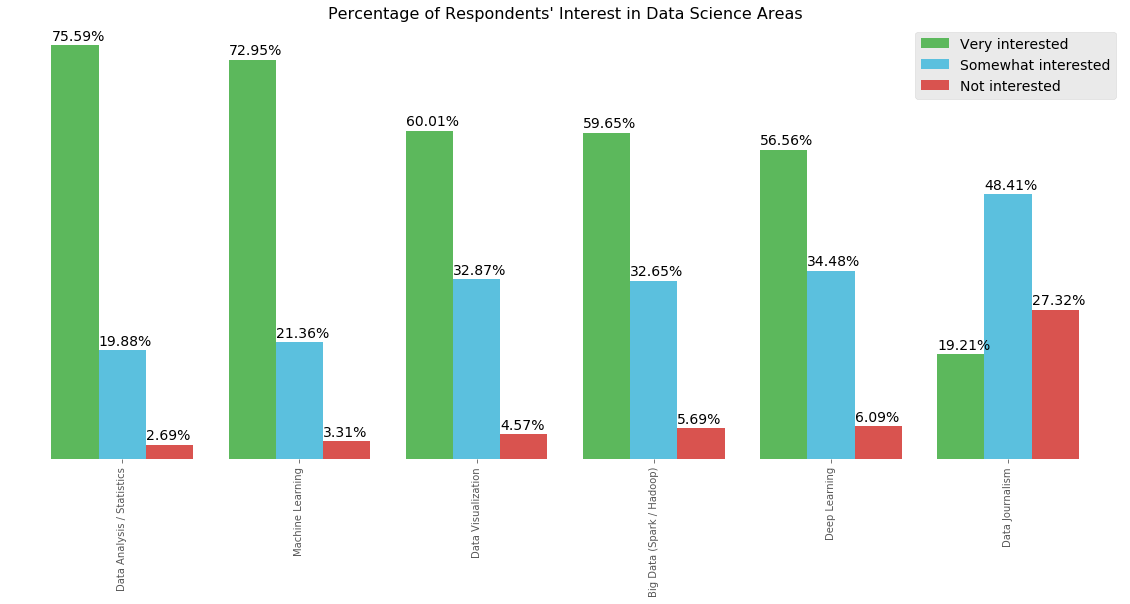

In [137]:
# create bar chart
ax = df_perc.plot(kind='bar', figsize=(20, 8), width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'])

# add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize=16)
ax.set_frame_on(False)
ax.set_xlabel(False).set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# attach a text label above each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.2%}'.format(height/100), (x, y + height + 0.9), size=14)
ax.legend(fontsize=14)

plt.grid(False)
plt.show()


#### Task 2

In the final lab, we created a map with markers to explore crime rate in San Francisco, California. In this question, you are required to create a Choropleth map to visualize crime in San Francisco.

Before you are ready to start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes *(including all the 39 crime type categories)*.

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:
1. Central,
2. Southern,
3. Bayview,
4. Mission,
5. Park,
6. Richmond,
7. Ingleside,
8. Taraval,
9. Northern, and,
10. Tenderloin.

Convert the San Francisco dataset, which you can also find here, [San Francisco dataset](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Police_Department_Incidents_-_Previous_Year__2016_.zip), into a *pandas* dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.

Paste this link in the browser and download the zip file.

Extract the csv file from the zip file.

Later upload the csv file to skills lab and use it.

In [200]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# read the dataset
file_name = 'C:/Users/hotty/Desktop/Online _Coursera/IBM Data Science Professional Certificate/Data Visualization with Python/Police_Department_Incidents_-_Previous_Year__2016_.csv'

df_sf = pd.read_csv(file_name)
print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [201]:
# display the first 5 rows of the dataset
df_sf.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [202]:
# drop columns and count the number of 'PdDistrict' using method value_counts 
df_sf.drop(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'], axis=1, inplace=True)
df_sf.rename(columns={'IncidntNum':'Count', 'PdDistrict':'Neighborhood'}, inplace=True)
df_sf.columns=list(map(str,df_sf.columns))
df_sf.set_index('Neighborhood',inplace=True)

df_sf.sort_values('Count',ascending=False)
df_sf = df_sf.groupby('Neighborhood').count()
df_sf.reset_index(inplace=True)
df_sf

Neighborhood  Count
0      BAYVIEW  14303
1      CENTRAL  17666
2    INGLESIDE  11594
3      MISSION  19503
4     NORTHERN  20100
5         PARK   8699
6     RICHMOND   8922
7     SOUTHERN  28445
8      TARAVAL  11325
9   TENDERLOIN   9942

Now you should be ready to proceed with creating the Choropleth map.

As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: GeoJSON

For the map, make sure that:

+ it is centred around San Francisco,
+ you use a zoom level of 12,
+ you use fill_color = 'YlOrRd',
+ you define fill_opacity = 0.7,
+ you define line_opacity=0.2, and,
+ you define a legend and use the **default threshold scale**.

If you follow the lab on Choropleth maps and use the GeoJSON correctly, you should be able to generate the following map:

In [207]:
# download countries geojson file
!wget --quiet 'C:/Users/hotty/Desktop/Online _Coursera/IBM Data Science Professional Certificate/Data Visualization with Python/san-francisco.geojson'

print('GeoJSON file downloaded!')

GeoJSON file downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [208]:
# import Folium
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [215]:
# create a map centered around san francisco
san_francisco_geo = r'san-francisco.geojson' # geojson file

# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# create a plain world map
san_francisco_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# generate choropleth map using the san francisco dataset
san_francisco_map.choropleth(
    geo_data=san_francisco_geo,
    data=df_sf,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in San Francisco'
)

# display map
san_francisco_map